#  «Анализ сотрудников компании и факторов увольнений (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели оттока сотрудников)»

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# игнорируем предупреждения системы
filterwarnings("ignore")

In [5]:
# Загружаем датасет
hr_ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr_ibm

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
hr_ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Датасет содержит 1470 записей. Имеет 35 атрибутов.

### Описание датасета.

Увольнение сотрудников неизбежный процесс практически для любых компаний вне зависимости от размера, количества сотрудников или оборотов.
Увольнение сотрудника всегда несет для компании риски и, как следствие, финансовые потери.
Риски, связанные с увольнением сотрудника:
    -время на поиск замены и адаптацию нового сотрудника (в течении этого времени, функционал, выполняемый сотрудником, перераспределяется среди других сотрудников подразделение, что ведет к повышенной нагрузке на других сотрудником и, как следствие их выгоранию),
    -уволившийся сотрудник может быть узким специалистом, поэтому время на его замену увеличивается,
    -уволившийся сотрудник может занимать руководящую позицию,  поэтому нужно заранее готовить ему замену из внутреннего кадрового резерва, или искать на рынке труда. 
    
Время на поиск и адаптацию нового сотрудника может быть очень существенным, исходя из занимаемой должности и необходимых компетенциях.

Поэтому для любой компании важно минимизировать количество увольняемых сотрудников, и в случаях, когда увольнения избежать не удается, знать о потенциальном увольнении заранее. Компания должна не просто набирать квалифицированных специалистов, но и следить за тем, чтобы они оставались на месте.

Исходя из этого стейкхолдерами данного исследования является в первую очередь HR служба компании, а также руководители всех уровней и направлений.

Целью данного исследования является поиск закономерностей и инсайдов по наиболее рисковым зонам (какие группы сотрудников нимболее подвержены риску увольнения). Данная информация поможет действовать на опережение и минимизировать причины высоких рисков. Это могут быть переработки, частые командировки, уровень заработанной платы и т.д.

Второй целью является построение предиктивной модели, что позволит не только работать с профилактикой увольнений сотрудников, но и планировать работу по поиску и развитию персонала.

Некоторые вопросы, на которые может помочь ответить данное исследование:
- Как влияет пол на увольнение?
- Как влияют деловые поездки на увольнение?
- Каково влияние расстояния от дома на увольнение?
- В каком департаменте больше всего случаев увольнения?
- Как влияют годы работы с текущим менеджером на увольнение?
- Какие должности больше всего подвержены увольнениям?
- Является ли зарплата одной из основных причин?
- Играет ли роль сфера образования?
- Играет ли роль уровень образования?
- Перегружает ли сверхурочная работа сотрудников и заставляет ли их увольняться?
- Какие факторы в большей степени способствуют увольнения?
- Каково влияние возраста на увольнение?
- Как самоудовлетворенность работой влияет на увольнение?
- Как баланс между работой и личной жизнью влияет на увольнение?
- Как опыт работы влияет на увольнение?
- Как продолжительность работы в текущей должности влияет на увольнение?
- Влияет ли процентный коэффициент увеличения заработной платы на увольнение?
- Сколько новых сотрудников уходит менее чем за год?

Датасет содержит 1470 строк, т.е. записей о 1470 сотрудниках.

### Целевым атрибутом исследования является увольнение сотрудника (Attrition).

### Атрибуты с информацией о сотрудниках можно разделить на несколько групп:

1. Персональная информация о сотрудниках.
- Age - возраст сотрудника.
- Gender - пол сотрудника.
- MaritalStatus - семейное положение сотрудника.
- Education - уровень образования сотрудника.
- EducationField - область образования сотрудника.
- NumCompaniesWorked - количество компаний, в которых работал сотрудник.
- DistanceFromHome - расстояние от дома до работы.
- EmployeeNumber - уникальный идентификатор для каждой записи о сотруднике.
- Over18 - сотруднику старше 18 лет.

2. Сведения о работе.
- JobLevel - уровень работы сотрудника.
- JobRole - должность сотрудника.
- Department - департамент, в котором работает сотрудник.
- BusinessTravel - частота командировок сотрудника.

3. Показатели эффективности и удовлетворенности.
- PerformanceRating - производительность, повышающий рейтинг эффективности сотрудника.
- RelationshipSatisfaction - удовлетворенность сотрудника своими отношениями.
- EnvironmentSatisfaction - удовлетворенность сотрудника своей рабочей средой.
- JobSatisfaction - удовлетворенность сотрудника своей работой.
- WorkLifeBalance - Восприятие сотрудника своего баланса между работой и личной жизнью.
- JobInvolvement - уровень вовлеченности сотрудника.

4. Финансовые показатели.
- MonthlyIncome - ежемесячный доход сотрудника.
- MonthlyRate - ежемесячная ставка заработной платы сотрудника.
- DailyRate - ежедневная ставка заработанной платы сотрудника.
- HourlyRate - почасовая ставка заработанной платы сотрудника.
- StockOptionLevel - уровень опциона на акции сотрудника.
- PercentSalaryHike - процентный коэффициент увеличения заработной платы сотрудника.
- StandardHours - стандартное рабочее время сотрудника.

5. История работы в компании.
- EmployeeCount - общее количество сотрудников в организации.
- OverTime - работают ли сотрудник сверхурочно
- TotalWorkingYears - общее количество лет, отработанных сотрудником.
- TrainingTimesLastYear - количество раз, когда сотрудники проходили обучение за последний год.
- YearsSinceLastPromotion - количество лет с момента последнего повышения сотрудника.
- YearsWithCurrManager - количество лет, в течение которых сотрудник работает со своим текущим менеджером
- YearsAtCompany - количество лет, в течение которых сотрудник проработал в компании.
- YearsInCurrentRole - количество лет, в течение которых сотрудник занимал свою текущую должность.

Дополнительное описание к датасету. Приведенные ниже атрибуты являются дискретными.

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

## Исследование данных.

26 числовых атрибутов.\
9 категориальных атрибутов (включая целевой Attrition)

In [7]:
hr_ibm.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

💡 В датасете нет пропусков

In [8]:
have_duplicate_rows = hr_ibm.duplicated().any()
have_duplicate_rows

False

💡 В датасете нет дубликатов строк.

In [9]:
# уникальные значения по столбцам с сортировкой от меньшего к большему
hr_ibm.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

Здесь видно, что атрибуты Over18, StandardHours, EmployeeCount имеют только одно уникальное значение и не несут для исследования никакой полезной информации.\
Также для исследования не важен уникальный номер сотрудника (EmployeeNumber).\
Данные атрибуты можно удалять из датасета.

In [10]:
# удаление неинформативных атрибутов
hr_ibm.drop(columns=['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber'], inplace=True)

### Отдельно проанализируем  числовые и категориальные атрибуты.

In [11]:
hr_ibm_num = hr_ibm.select_dtypes('int64')
hr_ibm_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [12]:
hr_ibm_num.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [13]:
hr_ibm_obj = hr_ibm.select_dtypes('object')
hr_ibm_obj

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [14]:
hr_ibm_obj.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


В таблице выше мы можем видеть количество уникальных значений категориальных атрибутов.

In [15]:
# Категориальные и числовые атрибуты

cat = hr_ibm.select_dtypes(['object']).columns
num = hr_ibm.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [16]:
# уникальные значиения категориальных атрибутов
for i in cat:
    print('Unique values of ', i, set(hr_ibm[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
Unique values of  Department {'Human Resources', 'Sales', 'Research & Development'}
Unique values of  EducationField {'Technical Degree', 'Marketing', 'Medical', 'Human Resources', 'Other', 'Life Sciences'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Sales Executive', 'Manufacturing Director', 'Laboratory Technician', 'Sales Representative', 'Research Scientist', 'Research Director', 'Human Resources', 'Healthcare Representative', 'Manager'}
Unique values of  MaritalStatus {'Single', 'Divorced', 'Married'}
Unique values of  OverTime {'Yes', 'No'}


In [17]:
plt.rc('axes', titlesize=22)
plt.rc('axes', labelsize=18)
plt.rc('xtick',labelsize=18) 
plt.rc('ytick',labelsize=18)

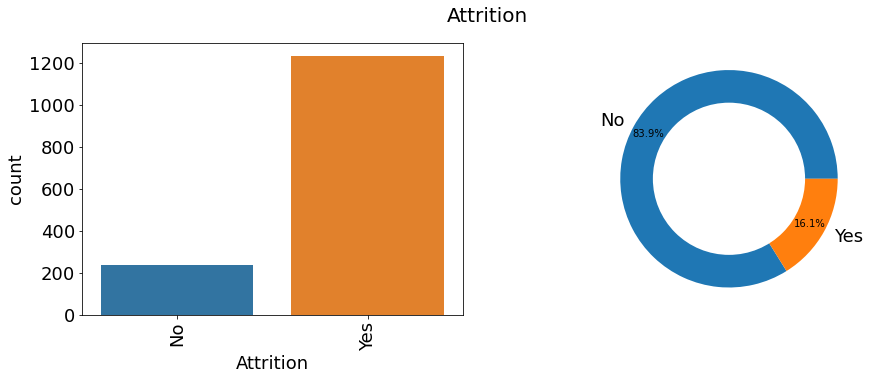

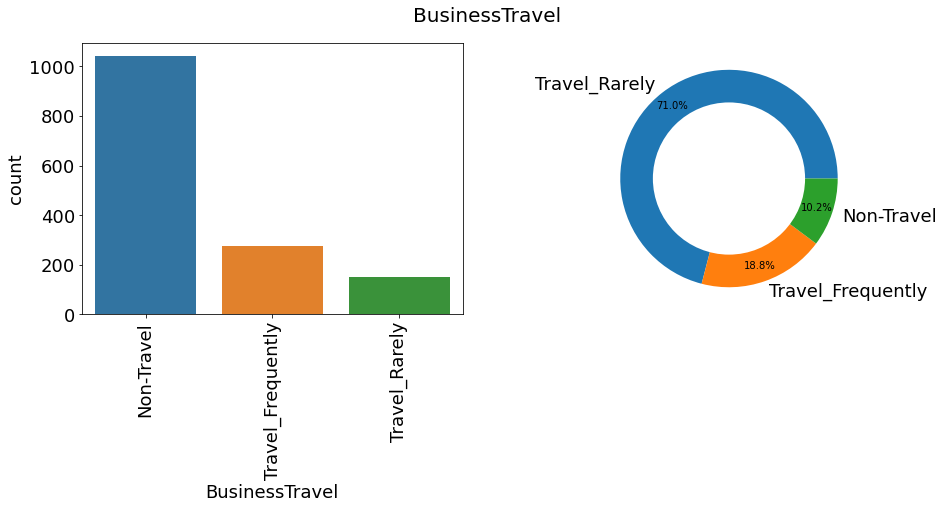

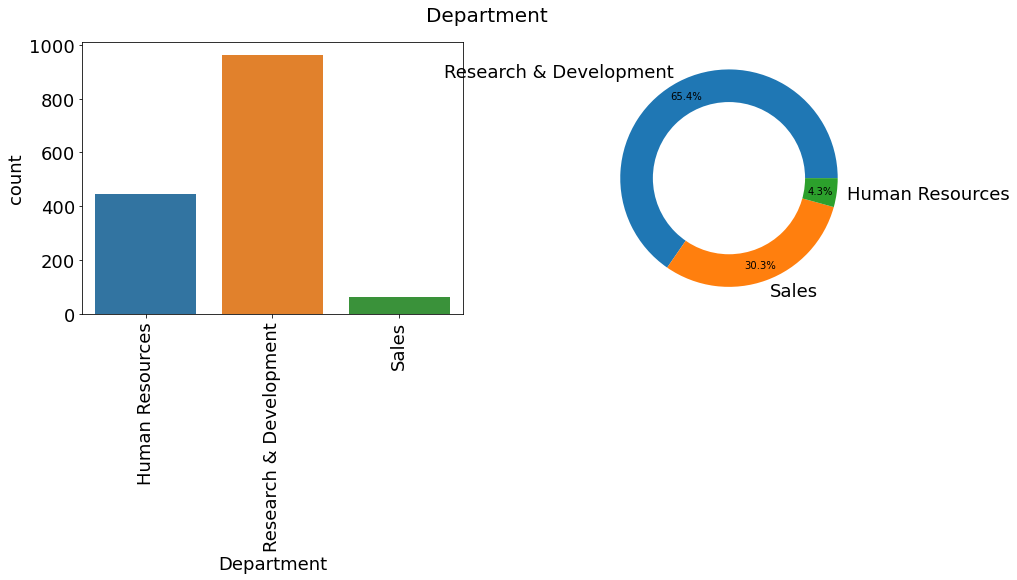

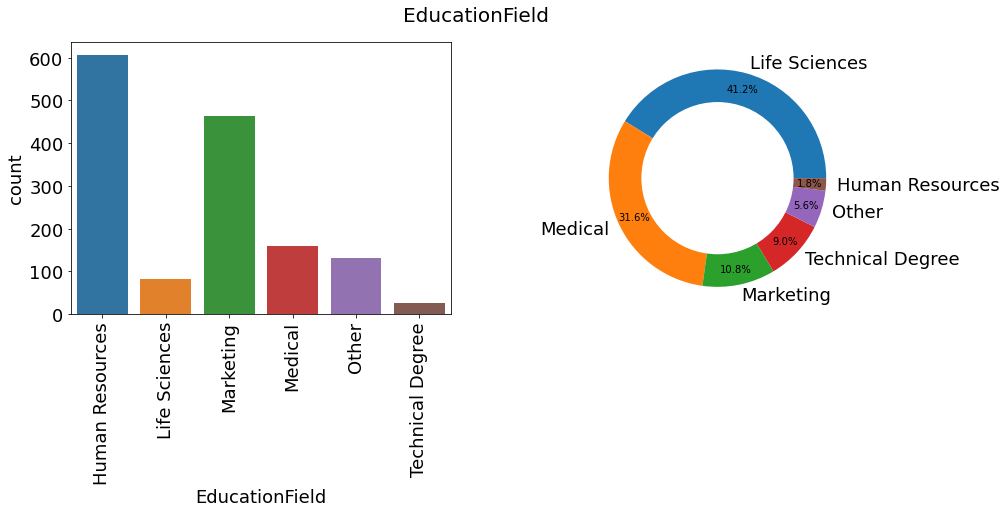

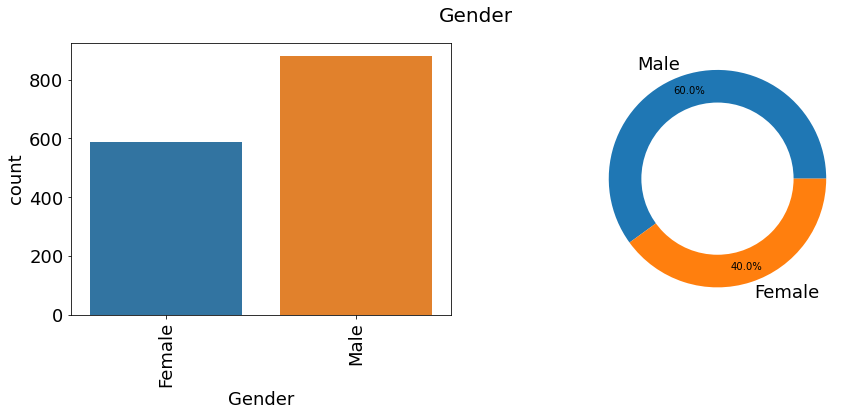

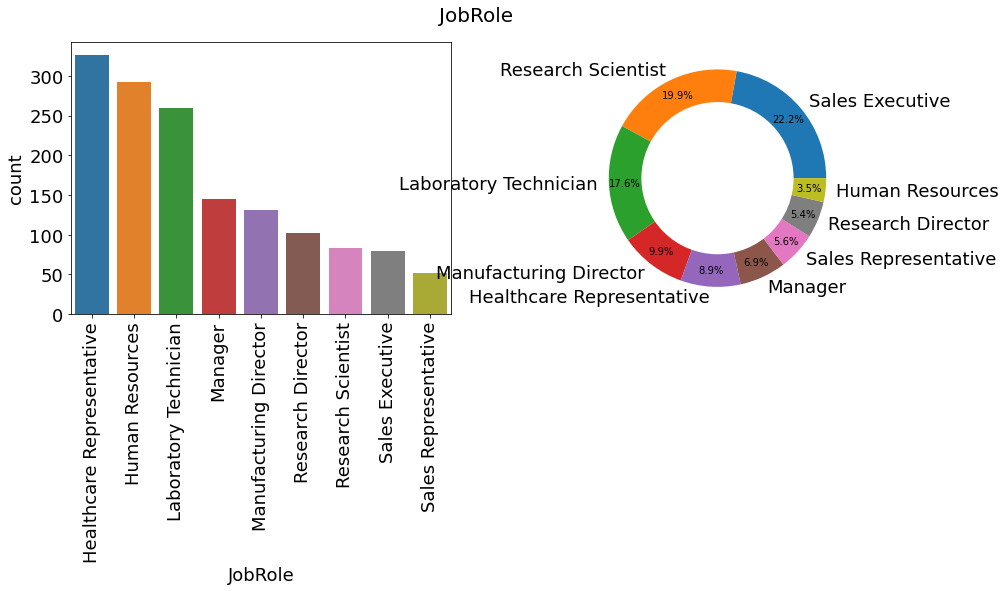

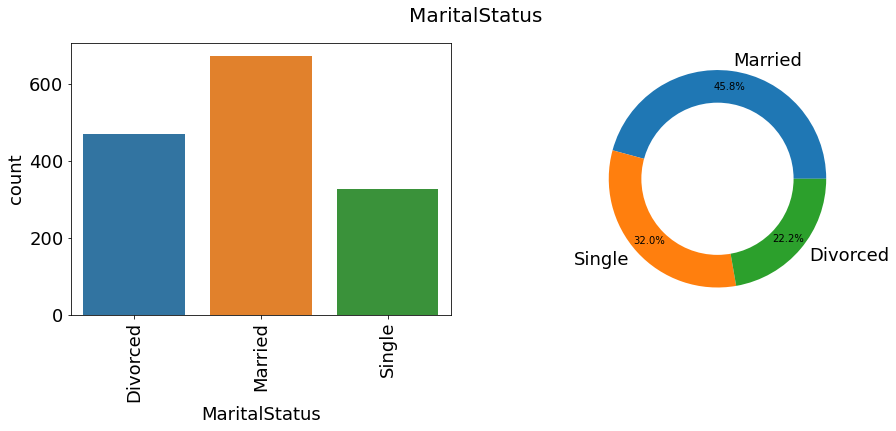

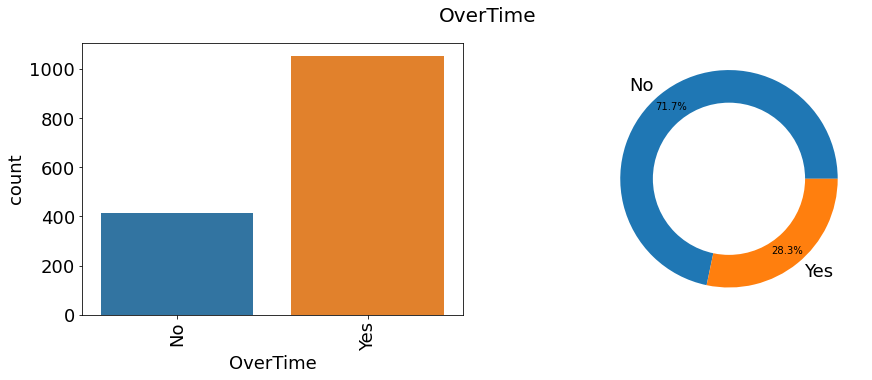

In [18]:
# распределение категориальных атрибутов:
# столбчатая диаграмма показывает количесво, круговая - долю

for i, col in enumerate(cat):
    # 2 графика, размер 10х5
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    ax=sns.countplot(data=hr_ibm_obj, x=col, ax=axes[0])
    activities = [var for var in hr_ibm_obj[col].value_counts().sort_index().index]
    # поворачиваем подписи на 90 градусов
    ax.set_xticklabels(activities,rotation=90)
    index = hr_ibm_obj[col].value_counts().index
    size = hr_ibm_obj[col].value_counts().values
    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)
    # внутренний круг
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,fontsize=20)
    plt.show()

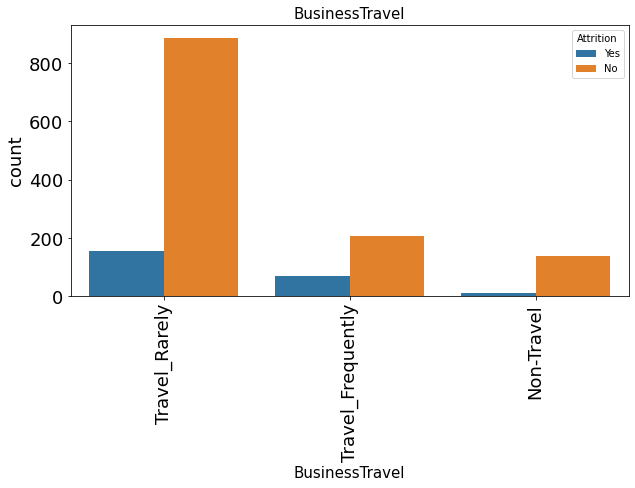

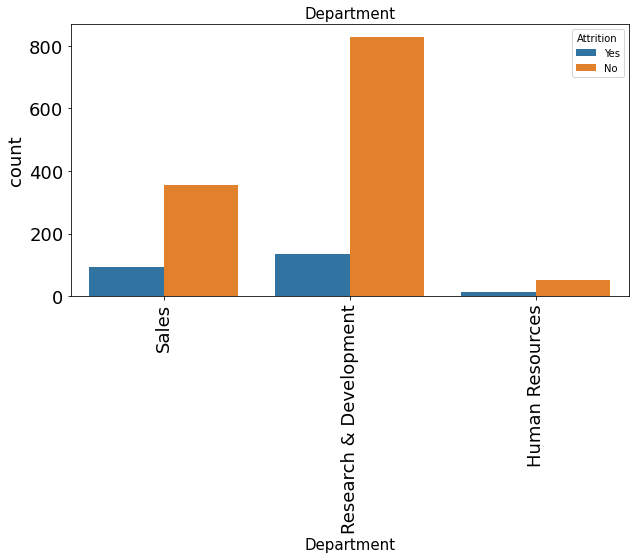

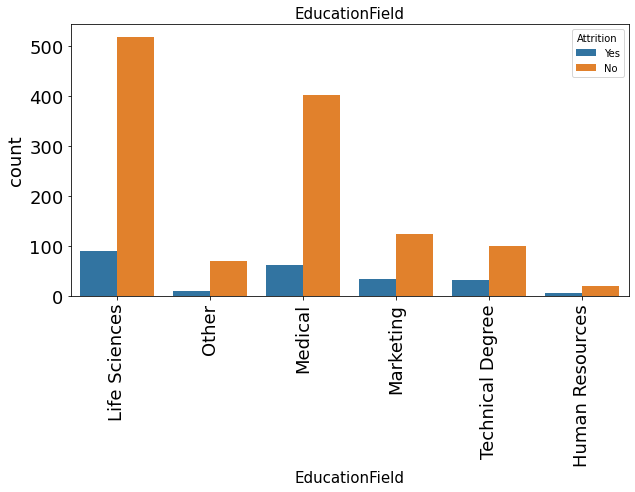

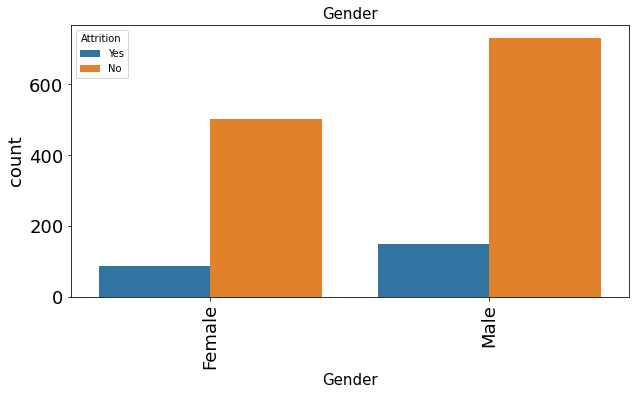

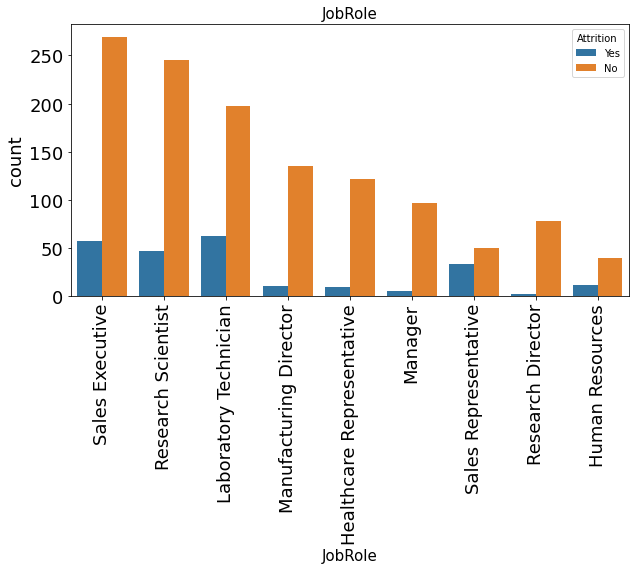

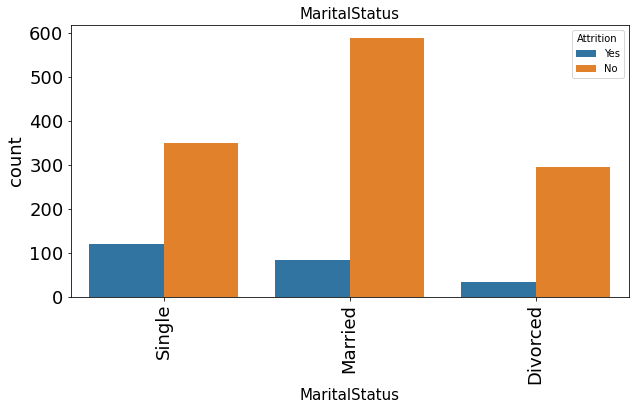

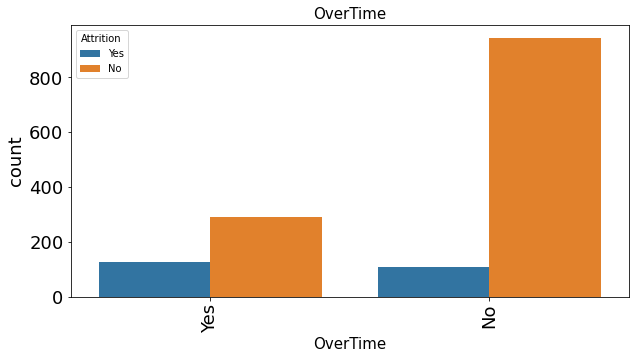

In [19]:
# распределение категориальных атрибутов в зависимости от увольнения сорудников (Attrition):

for col in cat : 
    if col == 'Attrition':
        continue
    plt.figure(figsize=(10,5))
    
    ax=sns.countplot(x=hr_ibm_obj[col], data=hr_ibm_obj,hue="Attrition")
#     for container in ax.containers:
#         ax.bar_label(container)
    plt.title(col,fontsize=15)
    plt.xticks(rotation=90)
    plt.xlabel(col,fontsize=15)
    #plt.grid()
    plt.show()

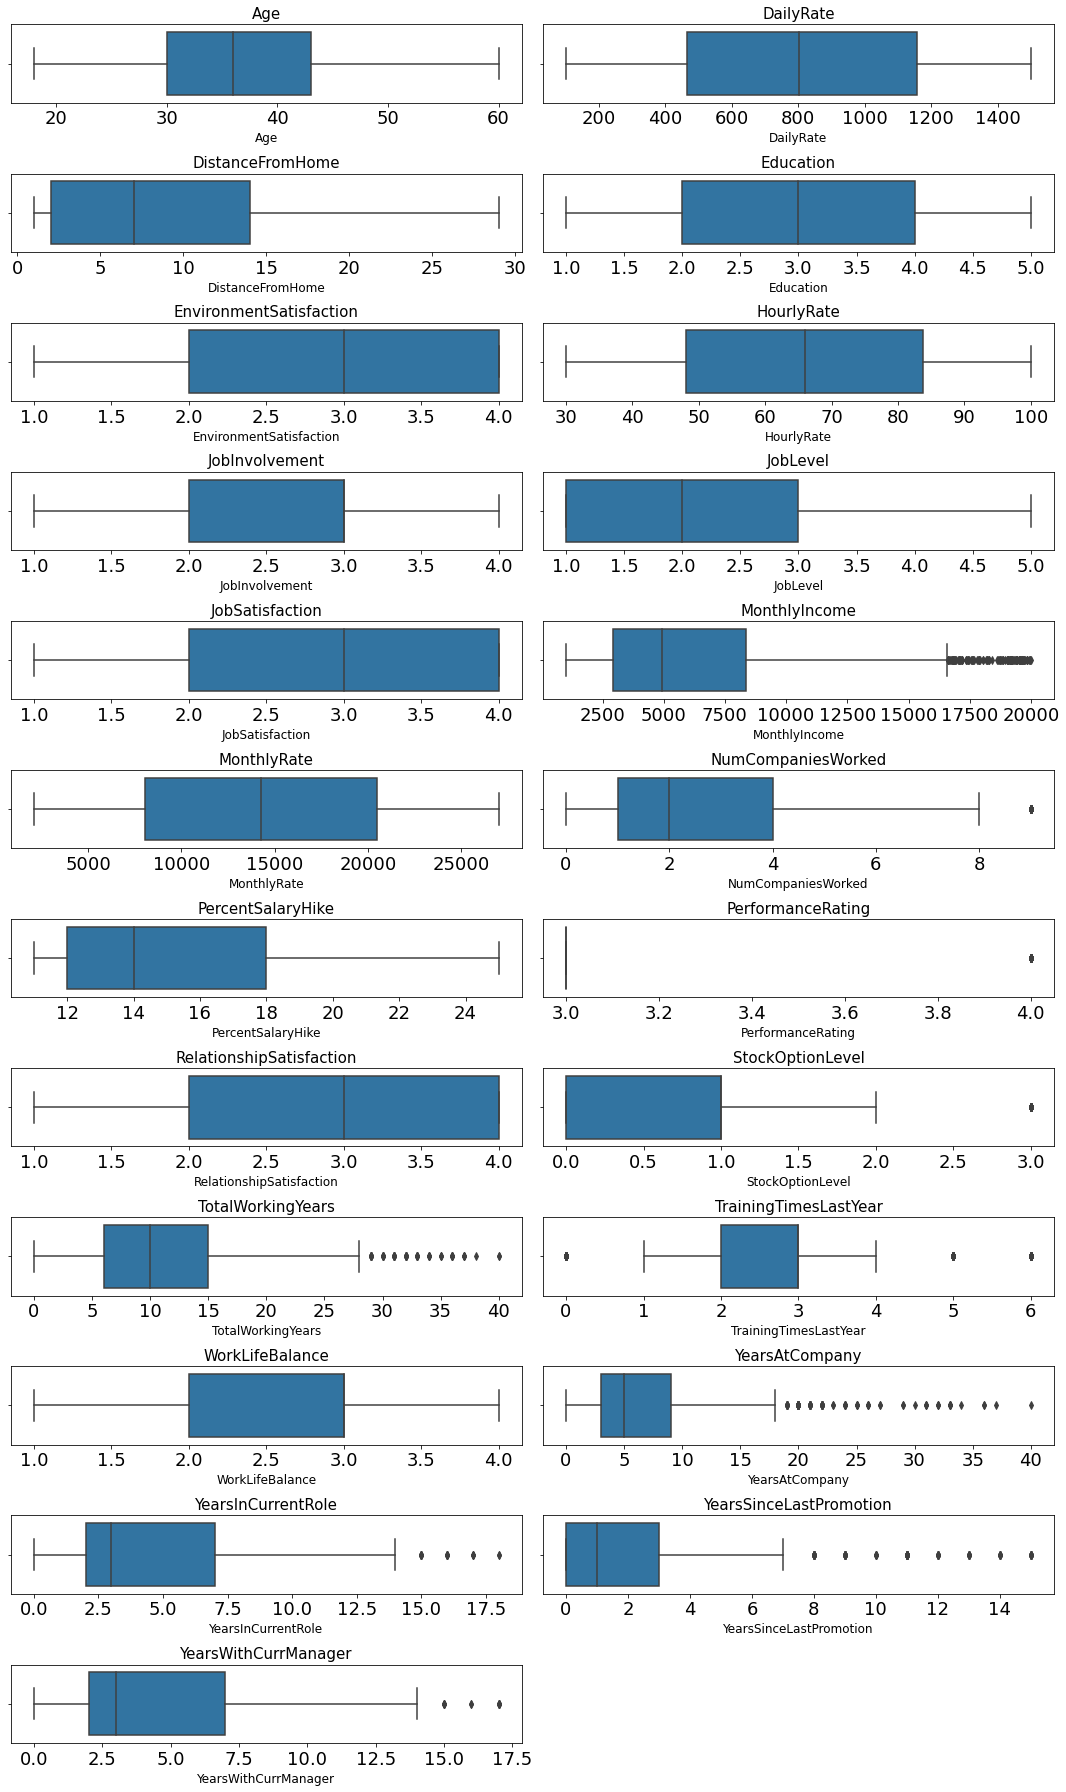

In [20]:
# распределение числовых показателей
plt.figure(figsize = (15,25))
for i, col in enumerate(num):
    plt.subplot(12, 2, i + 1)
    sns.boxplot(x = col, data = hr_ibm)
    plt.title(col,fontsize=15)
    plt.xlabel(col, size = 12)
plt.tight_layout()                     
plt.show()

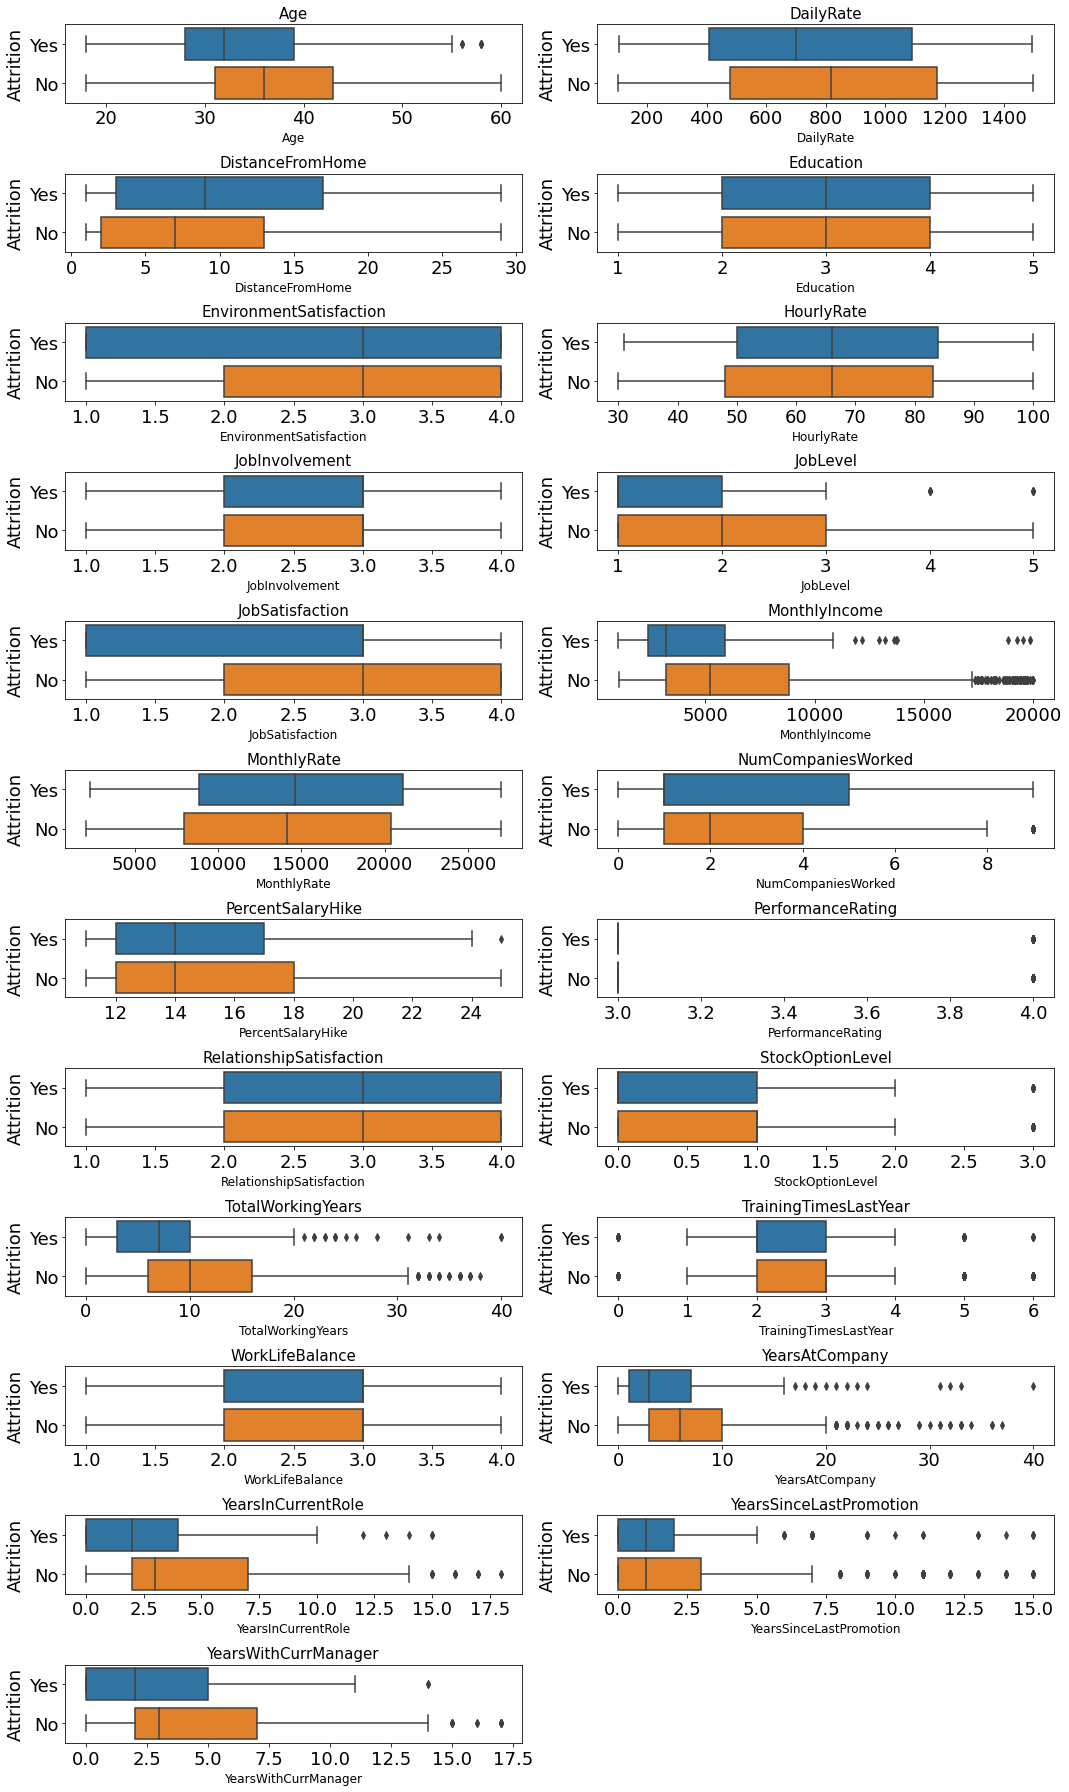

In [21]:
# распределение числовых показателей в зависимости от увольнения (Attrition)
plt.figure(figsize = (15,25))
for i, col in enumerate(num):
    plt.subplot(12, 2, i + 1)
    sns.boxplot(x = col, y = 'Attrition', data = hr_ibm)
    plt.title(col,fontsize=15)
    plt.xlabel(col, size = 12)
plt.tight_layout()                     
plt.show()

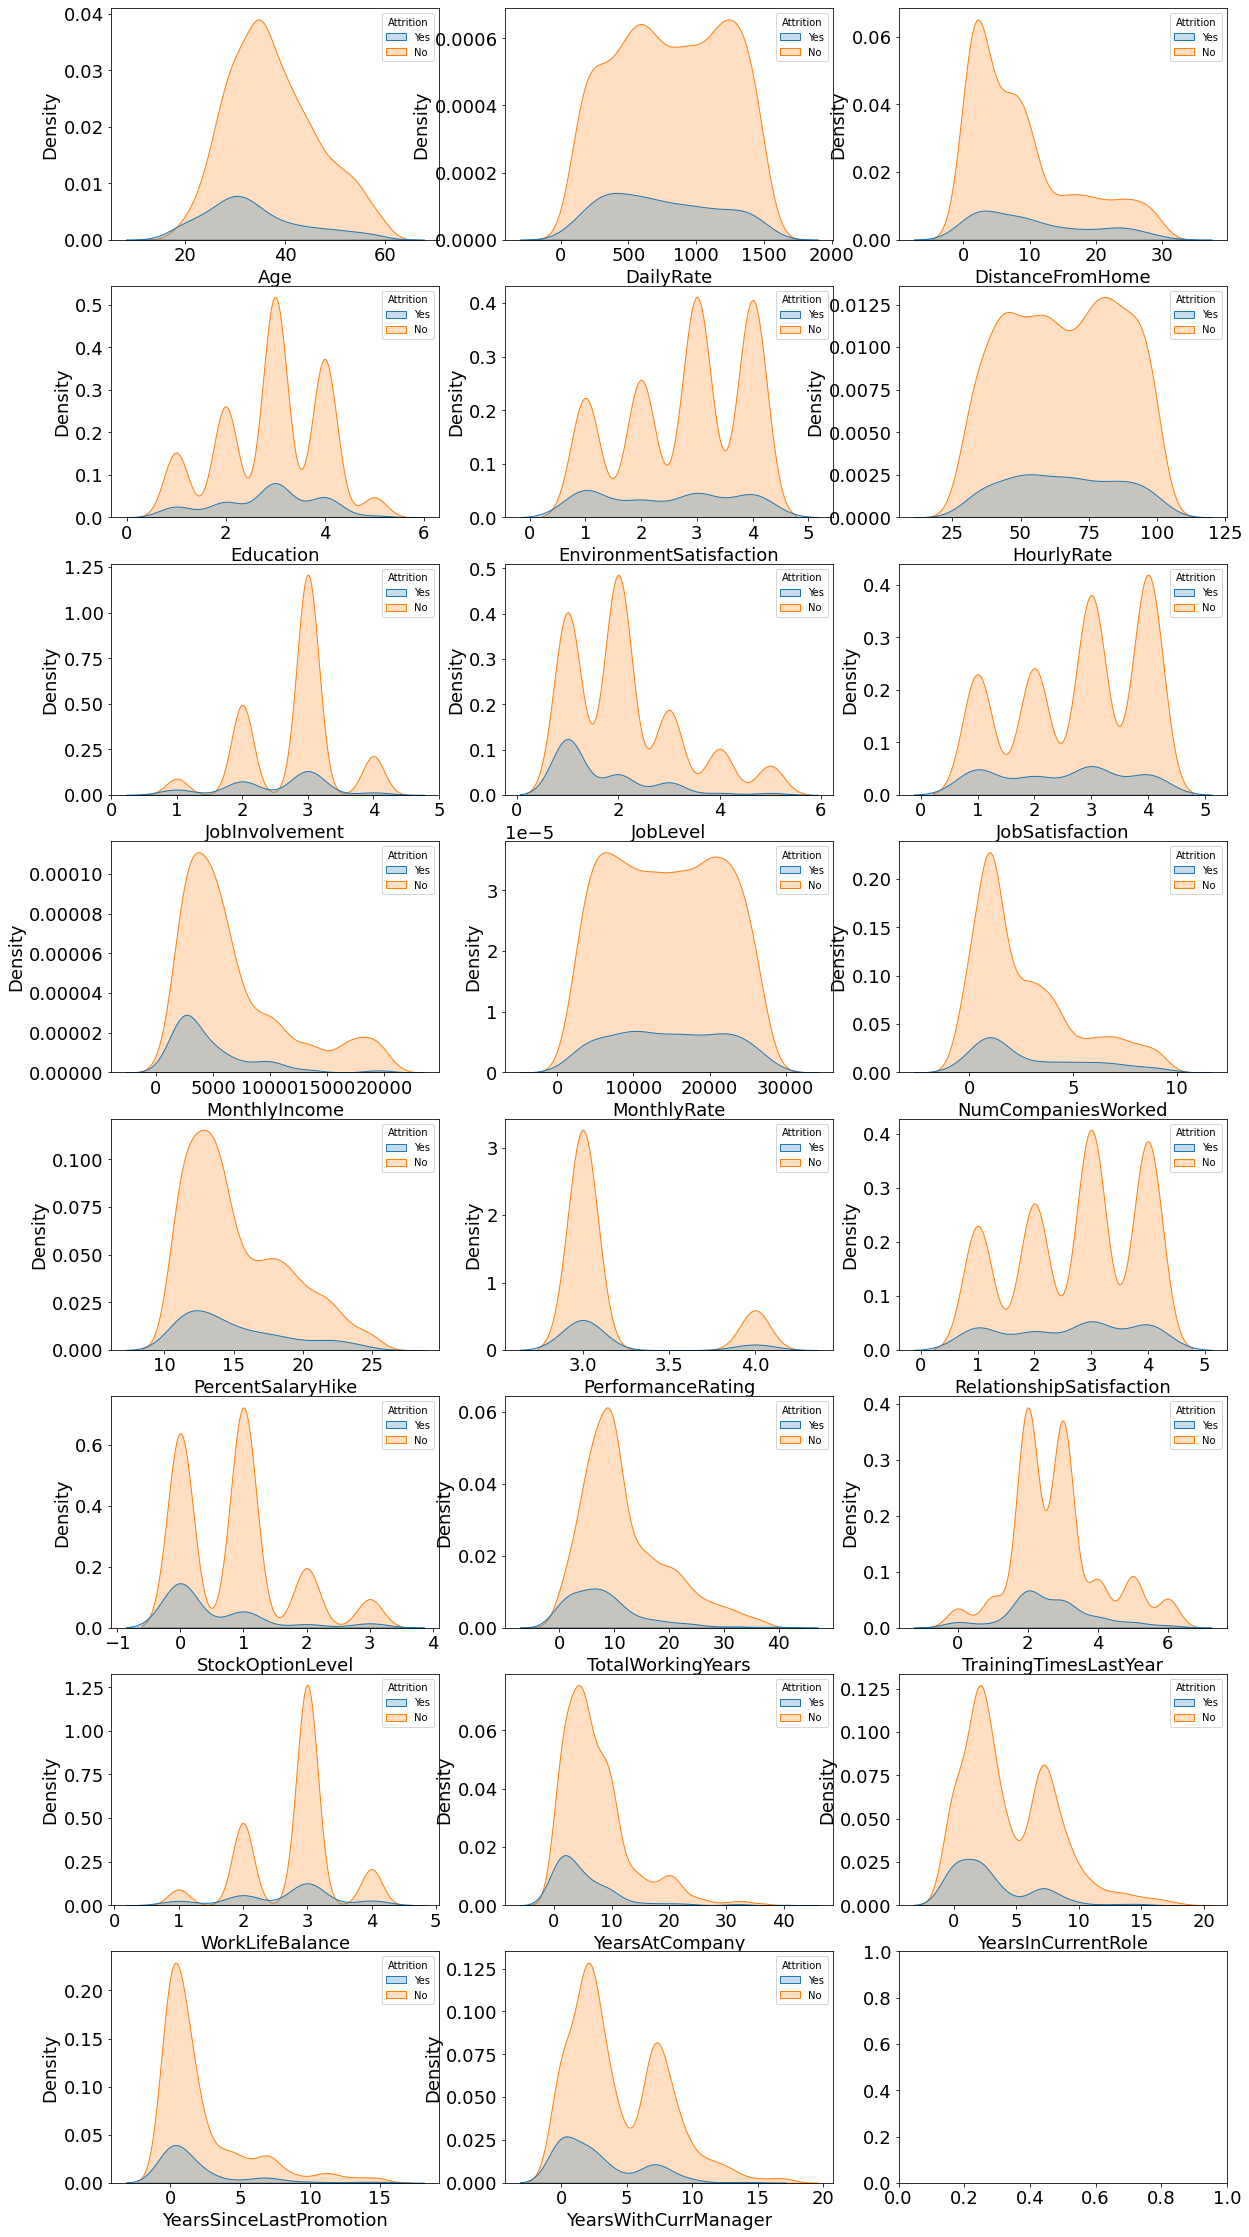

In [22]:
# распределение числовых атрибутов в зависимости от увольнения сорудников (Attrition):
fig, ax = plt.subplots(8, 3, figsize = (20, 40))
for i, col in enumerate(num):
    sns.kdeplot(data=hr_ibm, x=col, ax = ax[i // 3][i % 3], fill = True,  hue='Attrition')

Поскольку показателей достаточно большое количество, можно с разных сторон смотреть на влияние увольнений и искать инсайты.
Вот некоторые выводы из общих графиков:
- Увольнения являются самым высоким в возрасте от 18 до 35 лет и постепенно снижается.
- Средний возраст уволившихся сотрудников ниже, чем средний возраст оставшихся. Молодые более склонны к риску.
- С увеличением дохода увольнения уменьшаются.
- У одиноких людей увольнения происходят чаще.
- Увольнения сотрудников, которые обычно путешествуют, выше, чем у других.
- Уольнение является самым высоким среди сотрудников с показателем уровня работы равным 1.
- Больше всего увольняются на должности Laboratory Technician.
- Чем дольше сотрудник работает в компании, тем меньше вероятность его увольнения.

### Рассмотрим более детально отдельные факторы, влияющие на уольнение.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


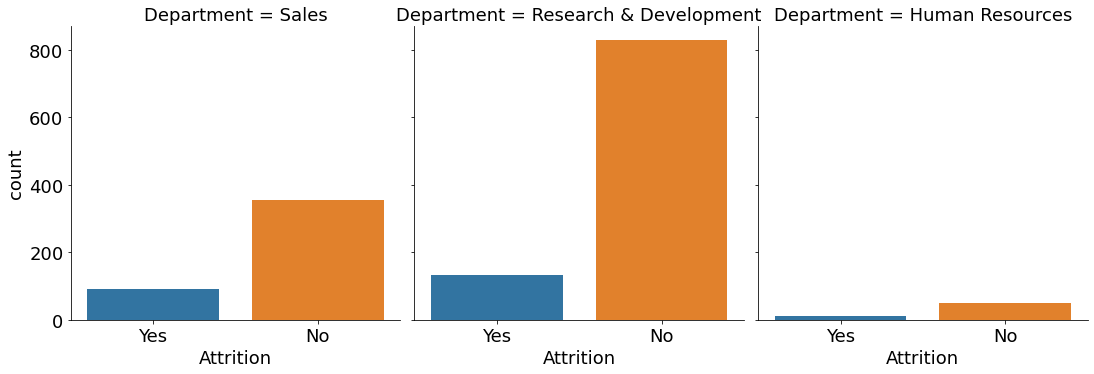

In [23]:
# Увольнения по департаментам
sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='Department')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.Department],margins=True,normalize='index')

Наибольший процент увольнений наблюдается в Sales - более 20%

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


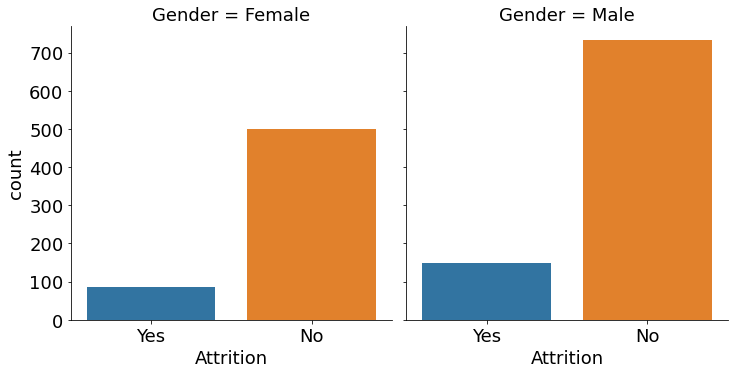

In [24]:
# Влияние пола на увольнение
sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='Gender')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.Gender],margins=True,normalize='index')

Мужчины более склонны к увольнениям, чем женщины

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


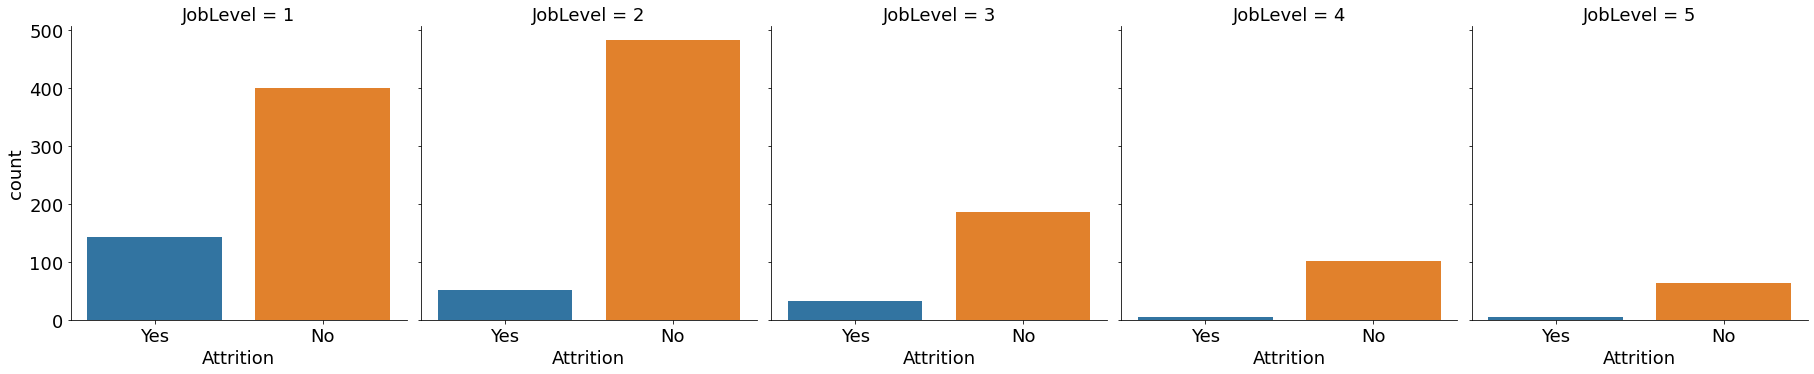

In [25]:
#Влияние уровня работы на увольнение
sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='JobLevel')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.JobLevel],margins=True,normalize='index')

Люди на 4-м уровне работы менее всего увольняются,при этом на 1-м и 3-м уровне работы максимальные процент увольнений

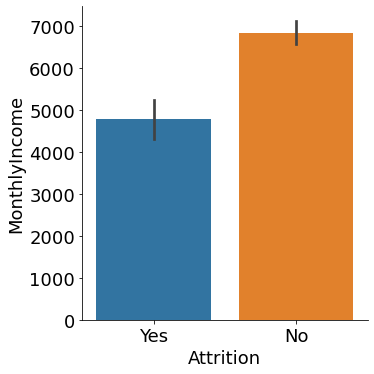

In [26]:
# Влияние ежемесячного дохода
sns.factorplot(data=hr_ibm,kind='bar',x='Attrition',y='MonthlyIncome')

Средний доход тех, кто не хочет увольняться существенно выше, чем у тех, кто увольняется. Из этого делаем вывод, что заработанная плата оказывает существенное влияние на увольнение сотрудников.

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


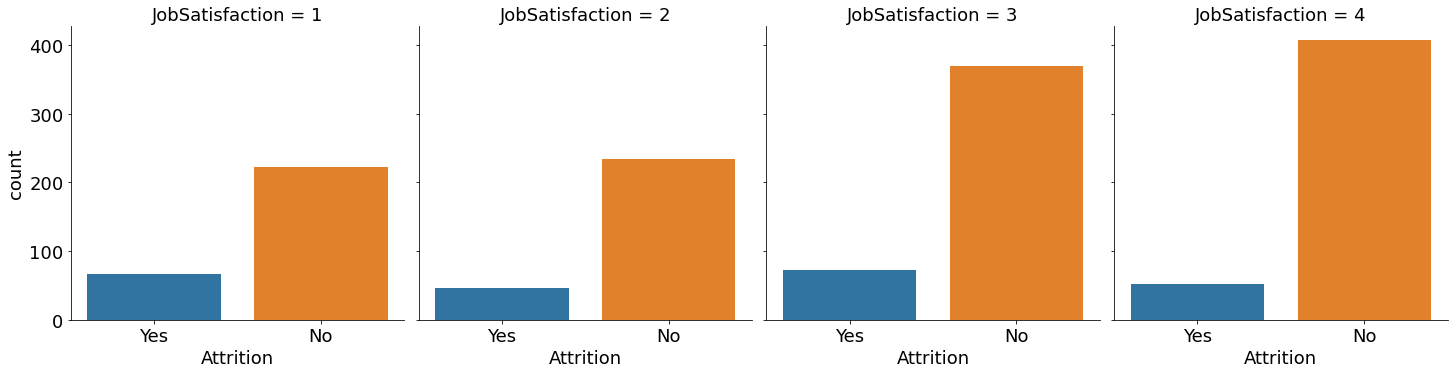

In [27]:
#Влияние удовлетворенности работой на увольнение
sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='JobSatisfaction')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.JobSatisfaction],margins=True,normalize='index')

При высокой удовлетворенности работой люди меньше увольняются,при этом уровни 2 и 3 сопоставимы.

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


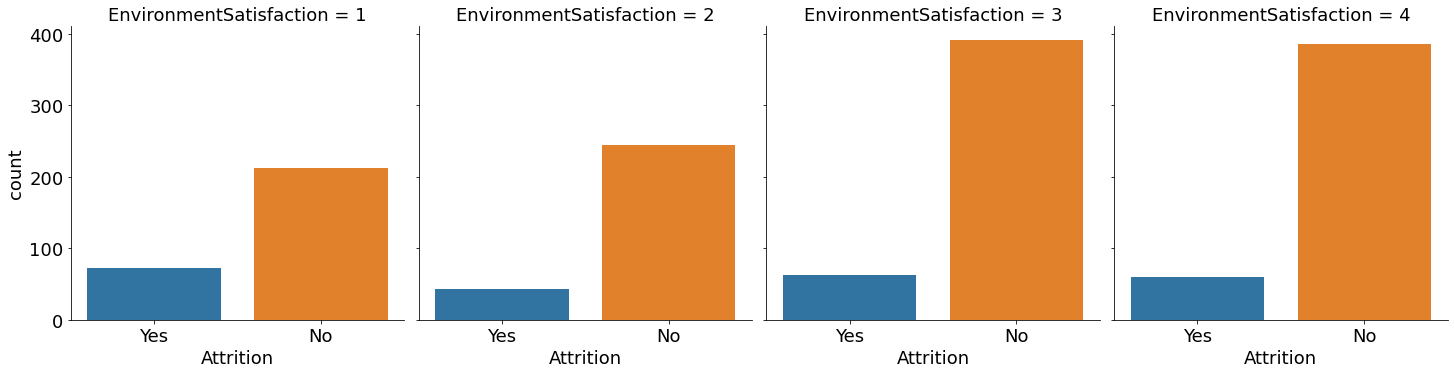

In [28]:
# Влияние удовлетворенности окружающей средой на увольнения
sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='EnvironmentSatisfaction')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.EnvironmentSatisfaction],margins=True,normalize='index')

Больше всего людей увольняется с низким уровнем удовлетворенности, уровни 2, 3, 4 сопоставимы

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


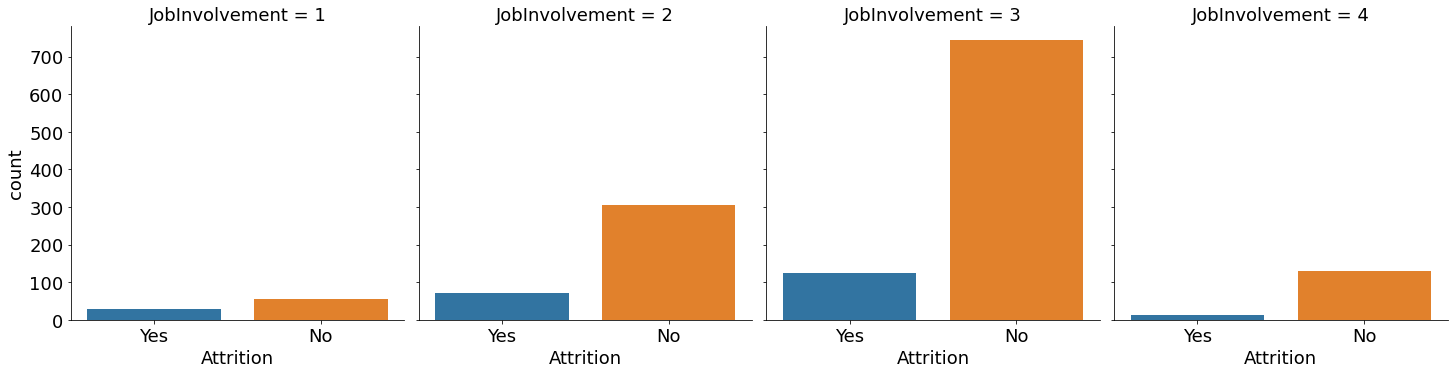

In [29]:
# влияние вовлеченности в работу на увольнения

sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='JobInvolvement')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.JobInvolvement],margins=True,normalize='index')

Наблюдается прямая линейная зависимость уволнений от вовлеченности в работу

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


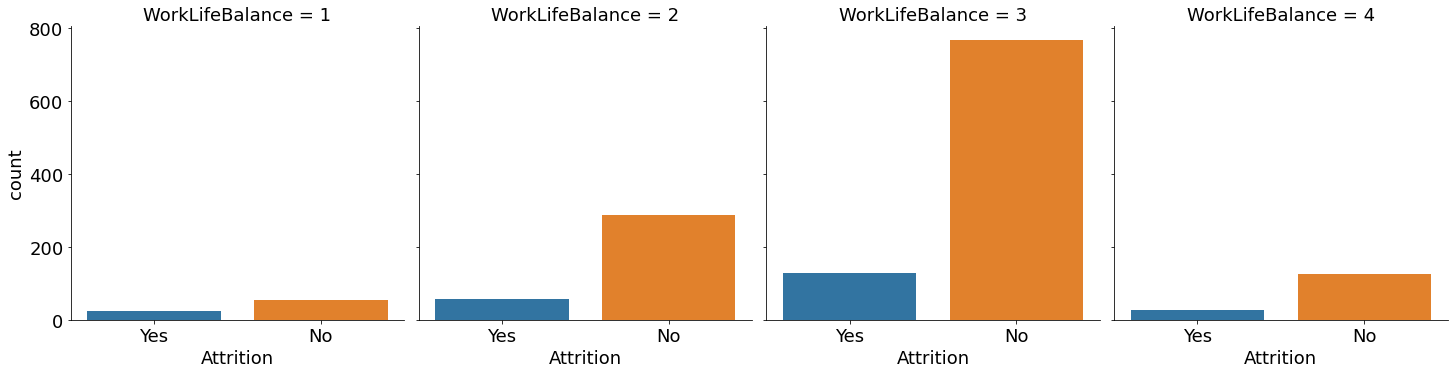

In [30]:
# Влияние баланса между работой и личной жизнью на увольнения

sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='WorkLifeBalance')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.WorkLifeBalance],margins=True,normalize='index')

Больше всего людей увольняется на самом низком показателе, при этом между значениями 3 и 4 наблюдается рост увольнений

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


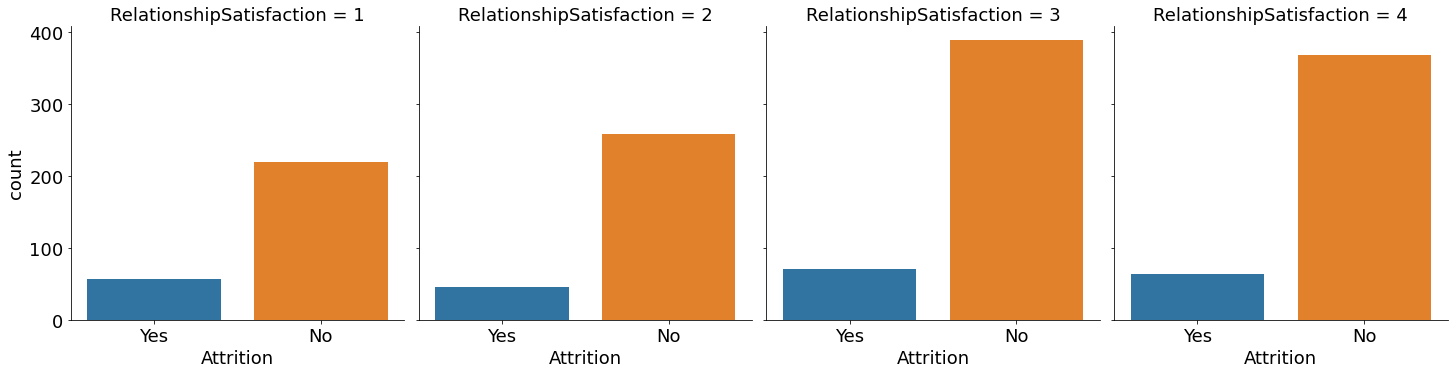

In [31]:
# Влияние удовлетворенности отношениями на увольнения

sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='RelationshipSatisfaction')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.RelationshipSatisfaction],margins=True,normalize='index')

Люди с самым низким значением удовлетворенности больше всего увольняются, на уровнях 2, 3, 4 значения сопоставимые

Attrition,No,Yes
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319
All,0.838776,0.161224


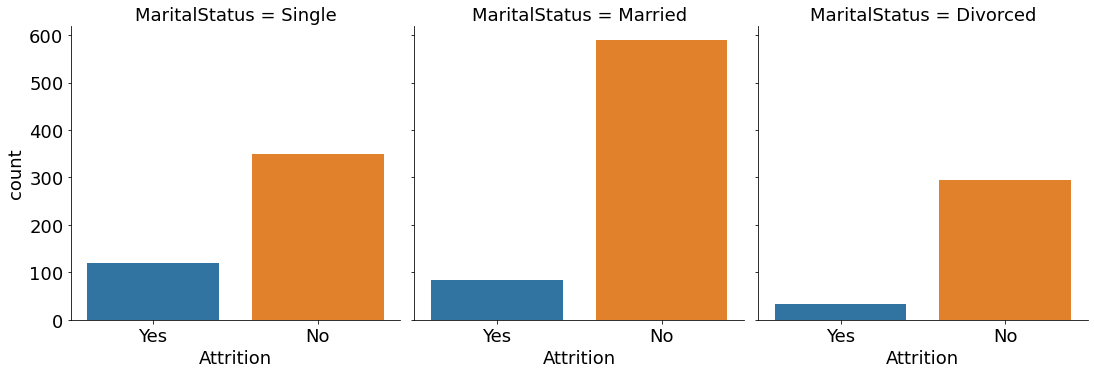

In [32]:
# Влияние семейного положения на увольнения
sns.factorplot(data=hr_ibm,kind='count',x='Attrition',col='MaritalStatus')
pd.crosstab(columns=[hr_ibm.Attrition],index=[hr_ibm.MaritalStatus],margins=True,normalize='index')

Одинокие люди существенно  чаще увольняются.

<AxesSubplot:>

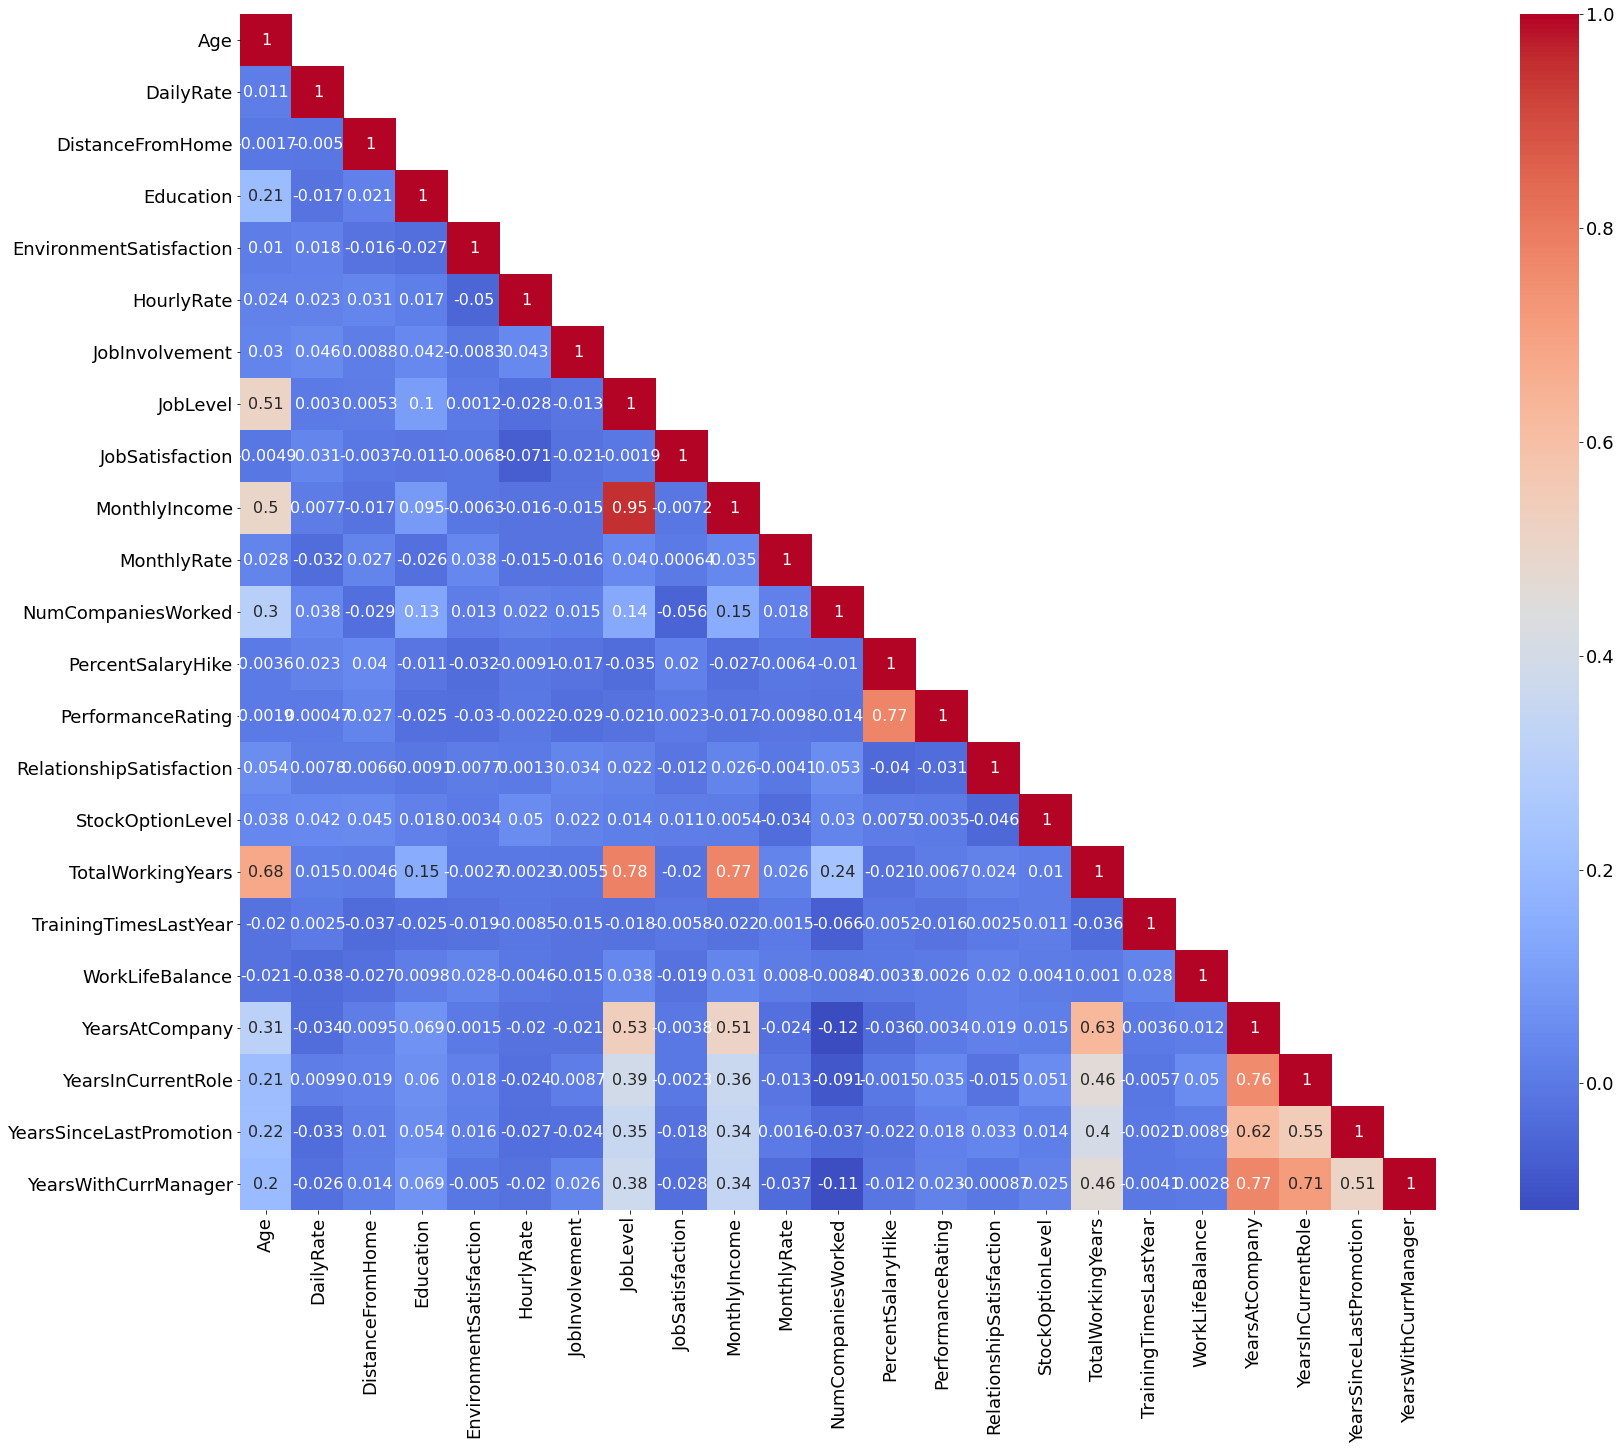

In [33]:
# тепловая карта
cor_mat = hr_ibm_num.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
# mask[:] = False
fig = plt.gcf()
fig.set_size_inches(30,22)
sns.heatmap(data=cor_mat,mask=mask,square=True ,annot=True, cbar=True, cmap='coolwarm',annot_kws={'fontsize':16})

# Метод .corr() возвращает корреляционную матрицу, содержащий значения корреляции с различными атрибутами. 
# Далее получаем  массив numpy из коллеляционной матрицы. Далее, используя метод np.tril_indices.from(), мы устанавливаем 
# значения нижней половины массива mask numpy в значение False. Для того, чтобы при передаче маски функции heatmap от seaborn 
# она отображает только те квадраты, маска которых имеет значение False. Следовательно, если мы этого не сделаем, то, поскольку 
# маска по умолчанию имеет значение True, квадрат не появится. 

На синие оттенки не обращаем внимания, т.к. здесь имеем слабую корреляцию. Интерес представляют только красные оттенки теловой карты. Их мало и можно разобрать детально.

- Возраст, что логично, коррелирует с годами, отработанными в компании. 
- Уровень работы имеет сильную корреляцию с месяным доходом.
- Рейтинг эффективности сотрудника коррелирует с роцентным коэффициентом увеличения заработной платы сотрудника.
- Количество лет, отработанных в компании коррелирует не только с возрастом, но и с уровенем работы и месячным доходом. А также с годами, отработанными с текущим менеджером, годами на текущей должности.

In [34]:
# заменим категориальные атрибуты на числа

hr_ibm_ = hr_ibm.copy(deep=True)
Attrition_dict  = {'No': 0, 'Yes': 1}
BusinessTravel_dict  = {'Travel_Frequently': 0, 'Non-Travel': 1, 'Travel_Rarely': 2}
Department_dict  = {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
EducationField_dict  = {'Other': 0, 'Medical': 1, 'Life Sciences': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Marketing': 5}
Gender_dict  = {'Male': 0, 'Female': 1}
JobRole_dict  = {'Sales Executive': 0, 'Healthcare Representative': 1, 'Research Director': 2, 'Sales Representative': 3, 'Manager': 4, 'Human Resources': 5, 'Laboratory Technician': 6, 'Manufacturing Director': 7, 'Research Scientist': 8}
MaritalStatus_dict  = {'Divorced': 0, 'Married': 1, 'Single': 2}
OverTime_dict  = {'No': 0, 'Yes': 1}

hr_ibm_['Attrition'] = hr_ibm_['Attrition'].apply(lambda x: Attrition_dict[x])
hr_ibm_['BusinessTravel'] = hr_ibm_['BusinessTravel'].apply(lambda x: BusinessTravel_dict[x])
hr_ibm_['Department'] = hr_ibm_['Department'].apply(lambda x: Department_dict[x])
hr_ibm_['EducationField'] = hr_ibm_['EducationField'].apply(lambda x: EducationField_dict[x])
hr_ibm_['Gender'] = hr_ibm_['Gender'].apply(lambda x: Gender_dict[x])
hr_ibm_['JobRole'] = hr_ibm_['JobRole'].apply(lambda x: JobRole_dict[x])
hr_ibm_['MaritalStatus'] = hr_ibm_['MaritalStatus'].apply(lambda x: MaritalStatus_dict[x])
hr_ibm_['OverTime'] = hr_ibm_['OverTime'].apply(lambda x: OverTime_dict[x])

In [35]:
# в новом датафрейме все атрибуты числовые
hr_ibm_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

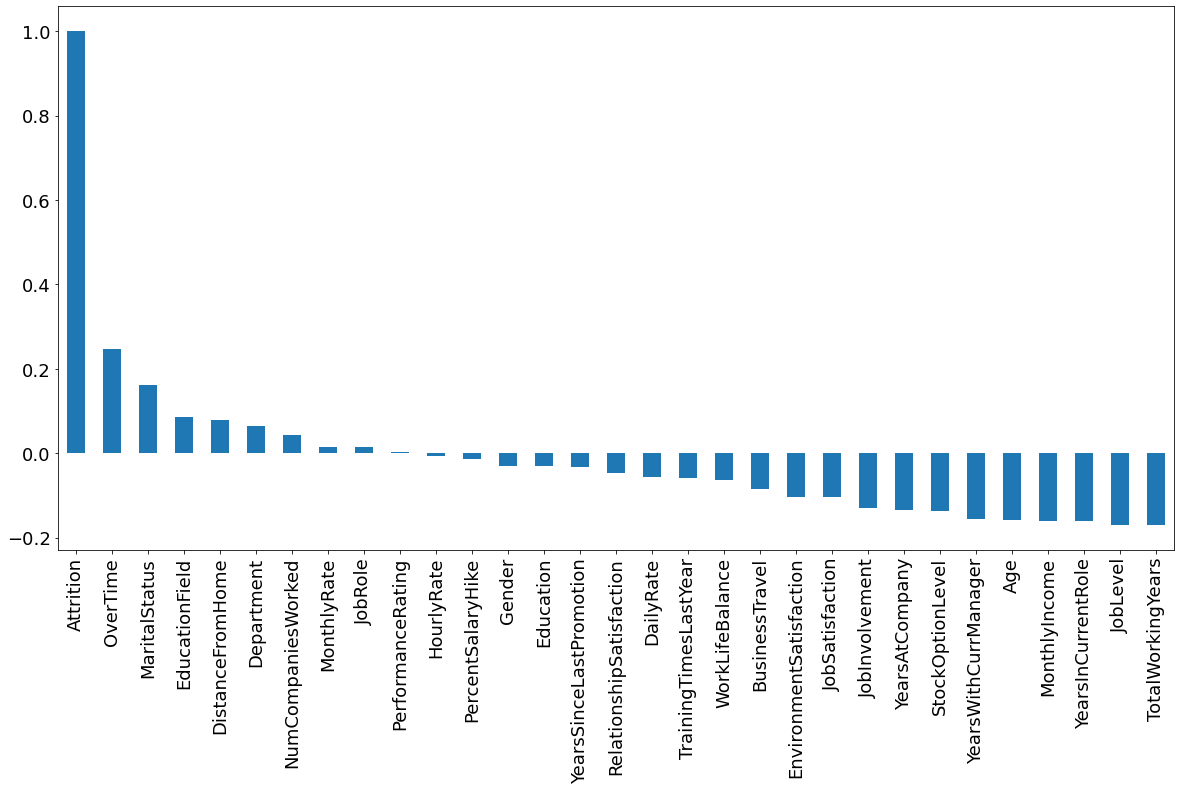

In [36]:
# корреляция увольнений (Attrition)
plt.figure(figsize=(20,10))
correlations=hr_ibm_.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

Как видно из графика наибольшая корелляция с  увольнениями у переработок и семейного положения. В свою очередь  количество лет, отработанных в компании и уровень работы имеют наибольшую отрицательную корреляцию.

## Построение предиктивной модели

Логистическая регрессия - это метод статистического анализа для прогнозирования бинарного результата, такого как "да" или "нет", на основе предыдущих наблюдений за набором данных. Модель логистической регрессии предсказывает зависимую переменную данных путем анализа взаимосвязи между одной или несколькими существующими независимыми переменными.

In [37]:
# Целевая переменная - увольнения (Attrition)
X = hr_ibm_.drop(columns=['Attrition'])
Y = hr_ibm_['Attrition']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [39]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)
# удалить y_pred_lg = log_reg.predict(X_test)

LogisticRegression()

In [40]:
# делаем прогноз используя тестовую выборку
log_reg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
# рассчитаем точность модели по тренеровочным данным
accuracy_score(y_train, log_reg.predict(X_train))

0.8324829931972789

In [45]:
# рассчитаем точность модели по тестовым данным
accuracy_score(y_test, log_reg.predict(X_test))

0.8605442176870748

In [46]:
# коэффициенты модели
log_reg.coef_

array([[-8.76893801e-03, -3.60983574e-02, -1.26190610e-04,
         2.10464485e-02,  1.77959080e-02,  7.37271618e-03,
         5.37334469e-02, -4.67591314e-02, -7.97730148e-03,
         4.80311361e-03, -4.59939275e-02, -8.46011926e-03,
        -4.21357102e-02, -6.21619881e-02,  6.85383428e-02,
        -7.91762231e-05,  1.25737740e-05,  1.38511600e-01,
         7.16446754e-02, -2.56757136e-02,  8.76613713e-04,
        -8.23961110e-03, -7.10038474e-02, -1.37395855e-02,
        -4.13180924e-02, -2.36407201e-02, -1.33972831e-02,
        -1.26171744e-01,  9.16681512e-02, -9.57764645e-02]])

Получена точность модели по тестовым данным 0,86, т.е. модель дает верное предсказание в 86% случаях. Не смотря на то, что точность модели на треневочных данных немного ниже, данная модель является рабочей. Таким образом, с помощью данной модели можно периодически анализировать данные сотрудников для выявления потенциальных увольений.

In [50]:
hr_ibm['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Данная модель обучалась на наблюдениях, смещенных в сторону Attrition = No, что логично, т.к. большинство сотрудников продолжают работать и не увольняются. Данная модель рабочая, т.к. вновь поступающие данные, будут иметь такое же смещение. Но чтобы увеличить точность модели, можно искусственно синтезировать данные, это позволит увеличить точность более 0,9.

# Итоги проекта и заключение.

Область исследования актуальна для любой компании. 
Стейкхолдерами являются руководители разных уровней и направлений. из этого следует, что актуальность данного исследования будет сохранятся всегда.

### По бизнес-задачам:

1. Определены наиболее рисковые категории сотрудников. Это позволит точечно проводить работы по сохранению персонала.
2. Построена предиктивной модели оттока сотрудников на основе логистической регрессии с точностью 86%. Это позволит периодически анализировать всех сотрудников компании на предмет риска увольнения.

Увольнения сотрудников неизбежны для всех компаний. Однако, с помощью данного исследования можно минимизировать увольнения сотрудников, а также своевременно набирать и развивать персонал. Как следствие, минимизация увольнения сотрудников позволяет минимизировать затраты компании на подбор и адаптацию персонала.

### Рекомендации:

- Продолжить сбор информации о сотрудниках для выявления дополнительных атрибутов, которые могут влиять на увольнения.
- Максимально полно собирать информацию о новых сотрудниках.
- При появлении новых атрибутов перестраивать предиктивную модель с учетом новых данных
- Переобучать модель при появлении новых данных.
- Регулярно проводить анализ с помощью предиктивной модели.
- Осуществлять регулярные мероприятия по сохранению персонала, особенно в рисковых зонах.